## Step 1: Importing Libraries

In [4]:
# Data Manipulation and Analysis
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_recall_curve, roc_curve, auc

# Advanced Models
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

# Set Seaborn style
sns.set(style="whitegrid", palette="pastel")

## Step 2 : Data Loading and Overview

In [6]:
# Load the dataset
df = pd.read_csv('digital_marketing_campaign_dataset.csv')

In [7]:
# Display the first few rows
print("Data Preview:")
df.head()

Data Preview:


,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [8]:
# Dataset info
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchase

In [9]:
# Checking for missing values
print("\nMissing Values in the Dataset:")
print(df.isnull().sum())


Missing Values in the Dataset:
CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64


In [10]:
# Descriptive statistics
print("\nDescriptive Statistics:")
df.describe()


Descriptive Statistics:


,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


## Step 3: Data Cleaning

In [12]:
# Dropping irrelevant columns
df = df.drop(columns=['CustomerID',"AdvertisingPlatform","AdvertisingTool"])  # Assuming the following columns are not useful for the model

In [13]:
#No Missing values in the datset

## Step 4: Exploratory Data Analysis (EDA)

<Figure size 1600x800 with 0 Axes>

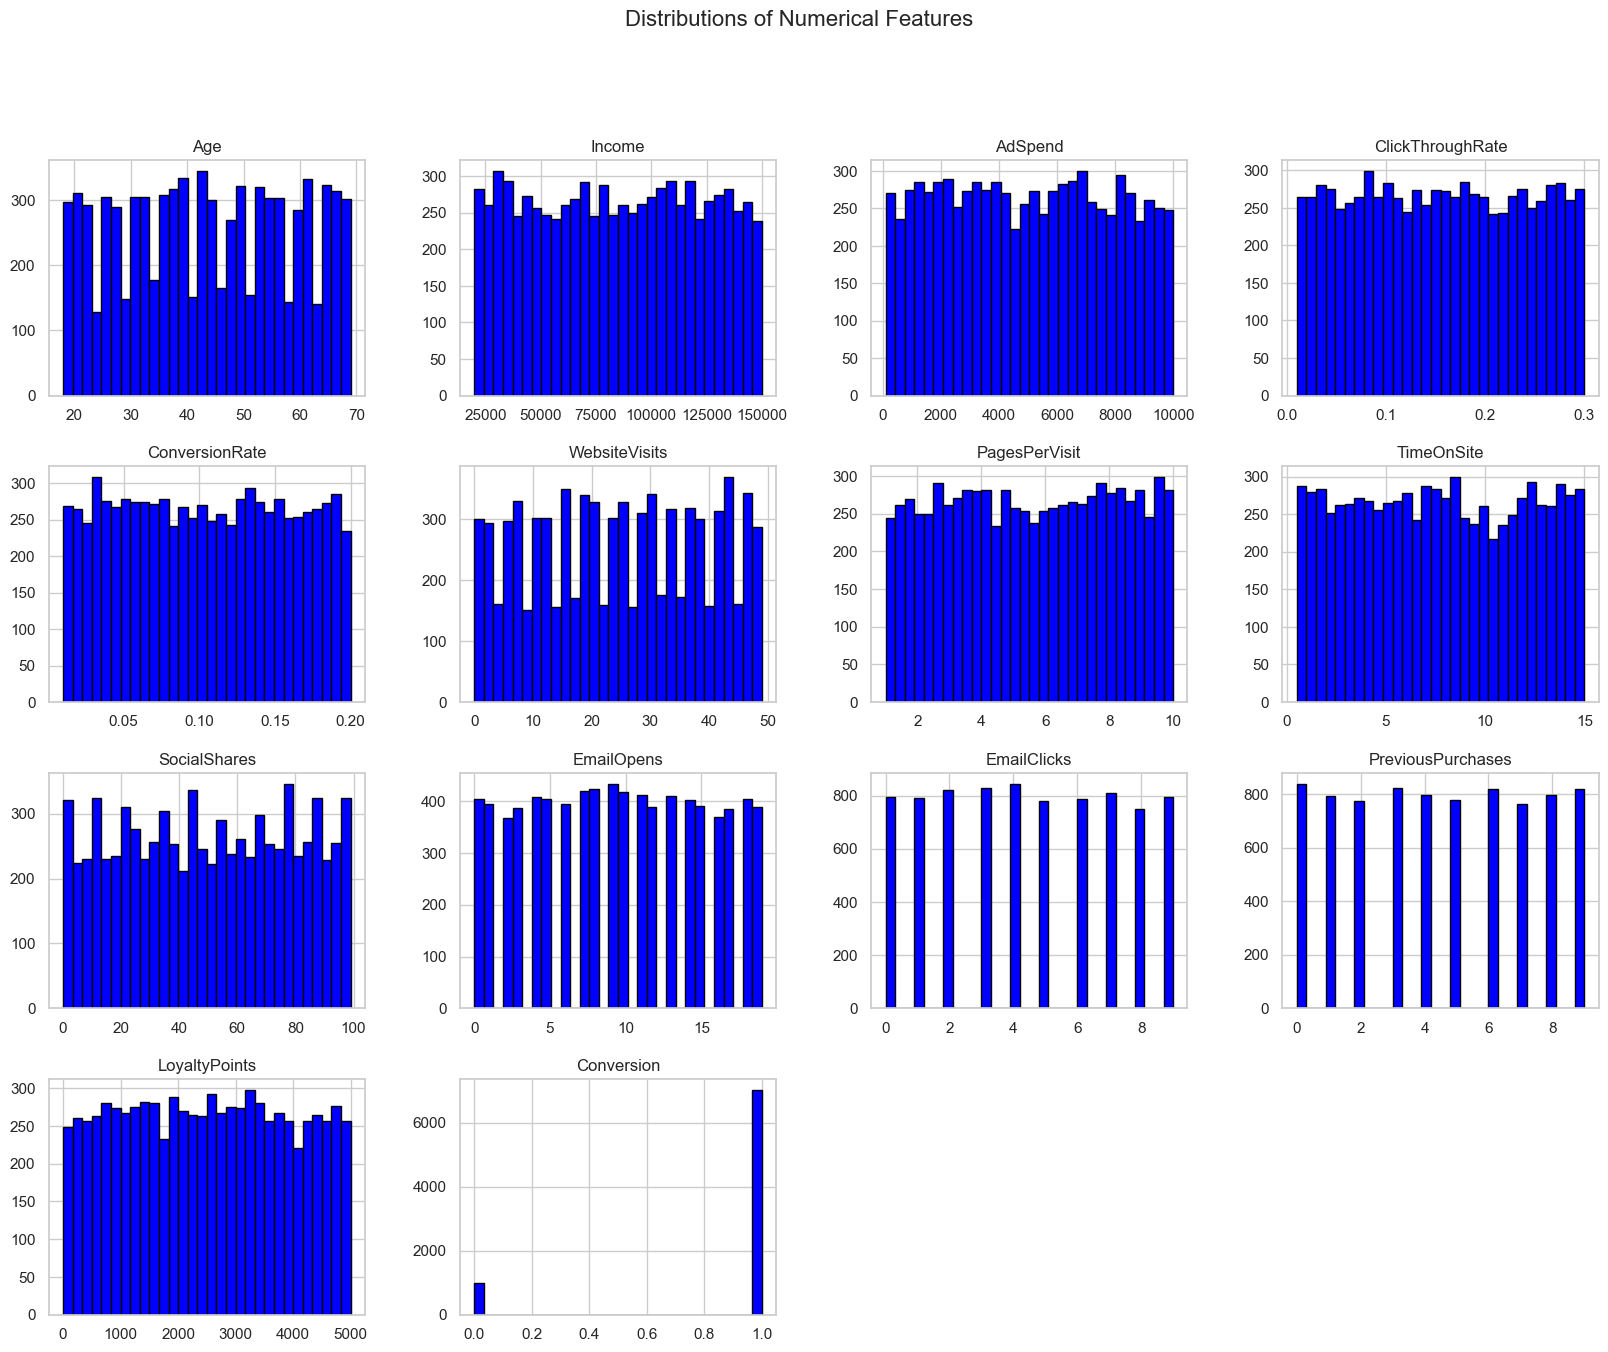

In [15]:
# 1. Visualizing Numerical Features (Distribution)
plt.figure(figsize=(16, 8))
df.hist(bins=30, figsize=(20, 15), color='blue', edgecolor='black')
plt.suptitle("Distributions of Numerical Features", fontsize=16)
plt.show()

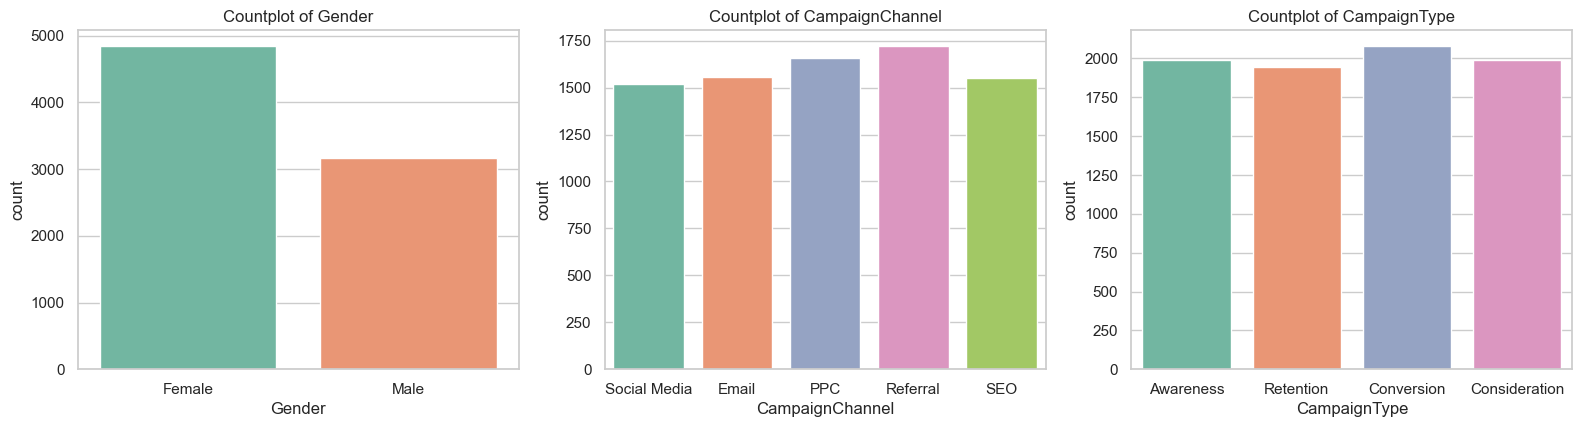

In [16]:
# 2. Visualizing Categorical Features (Countplot)
plt.figure(figsize=(16, 8))
for i, column in enumerate(df.select_dtypes(include=['object']).columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=column, palette="Set2")
    plt.title(f"Countplot of {column}")
plt.tight_layout()
plt.show()

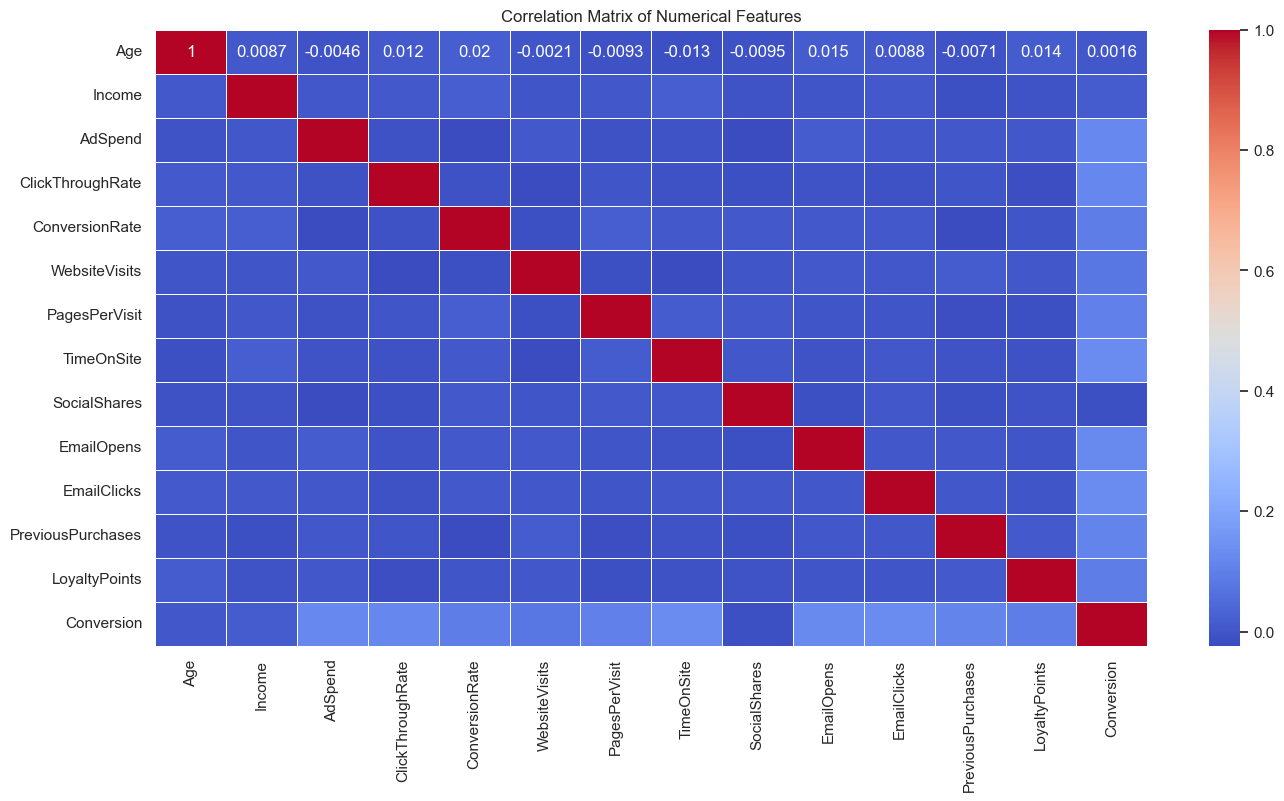

In [17]:
# 3. Correlation Matrix (Numerical Features)
plt.figure(figsize=(16, 8))

# Select only numerical columns for correlation
numerical_columns = df.select_dtypes(include=[np.number])

# Generate the correlation matrix
corr_matrix = numerical_columns.corr()

# Plot the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

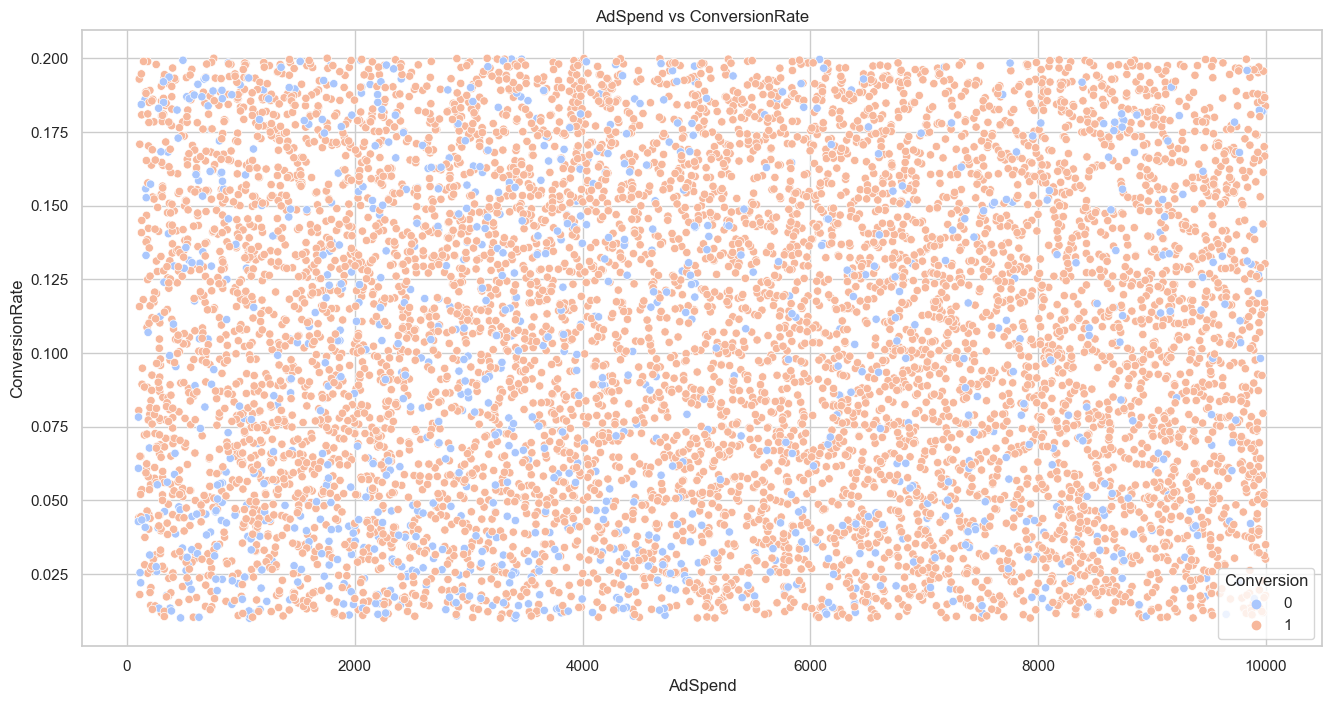

In [18]:
# 4. Scatterplots (Numerical vs Numerical)
plt.figure(figsize=(16, 8))
sns.scatterplot(x='AdSpend', y='ConversionRate', hue='Conversion', data=df, palette='coolwarm')
plt.title('AdSpend vs ConversionRate')
plt.show()

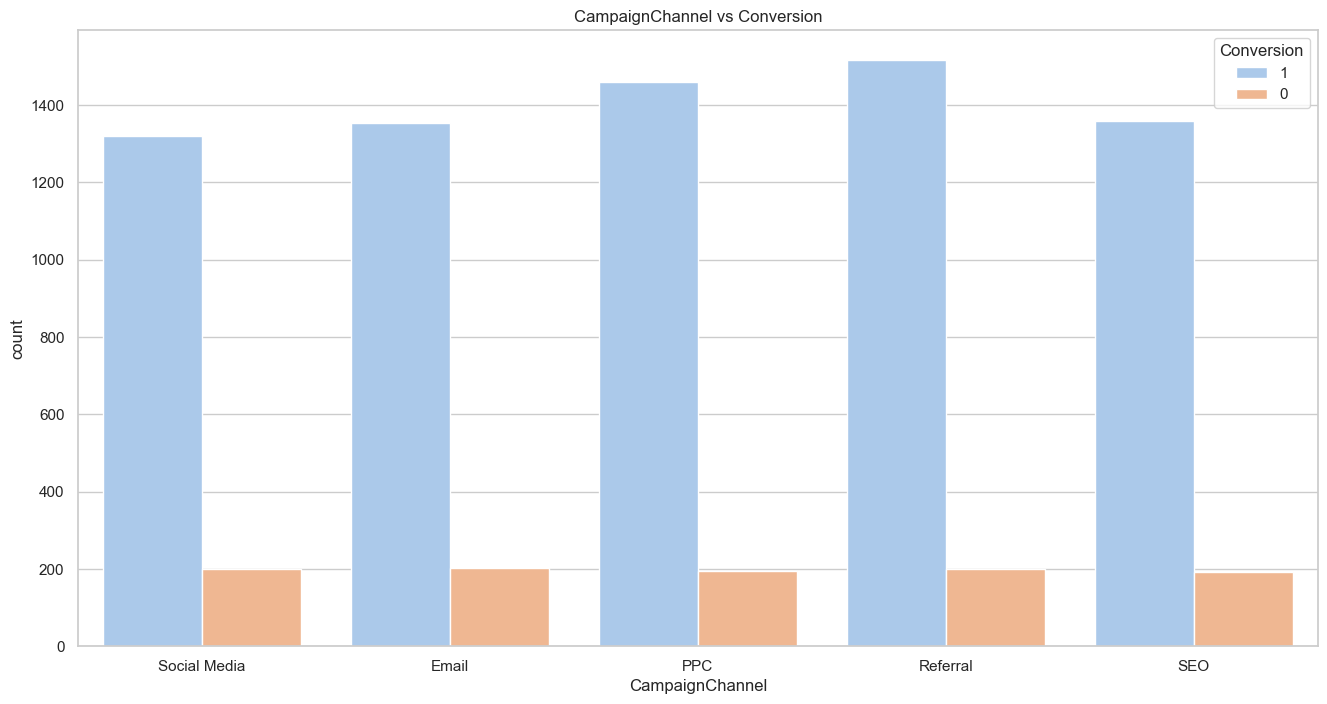

In [19]:
# 5. Categorical vs Conversion (Countplot)
df['CampaignChannel'] = df['CampaignChannel'].astype(str)  # Convert to string/categorical type
df['Conversion'] = df['Conversion'].astype(str)  # Convert to string/categorical type

# 5. Analyzing Categorical vs Conversion (Countplot)
plt.figure(figsize=(16, 8))
sns.countplot(x='CampaignChannel', hue='Conversion', data=df)
plt.title('CampaignChannel vs Conversion')
plt.show()

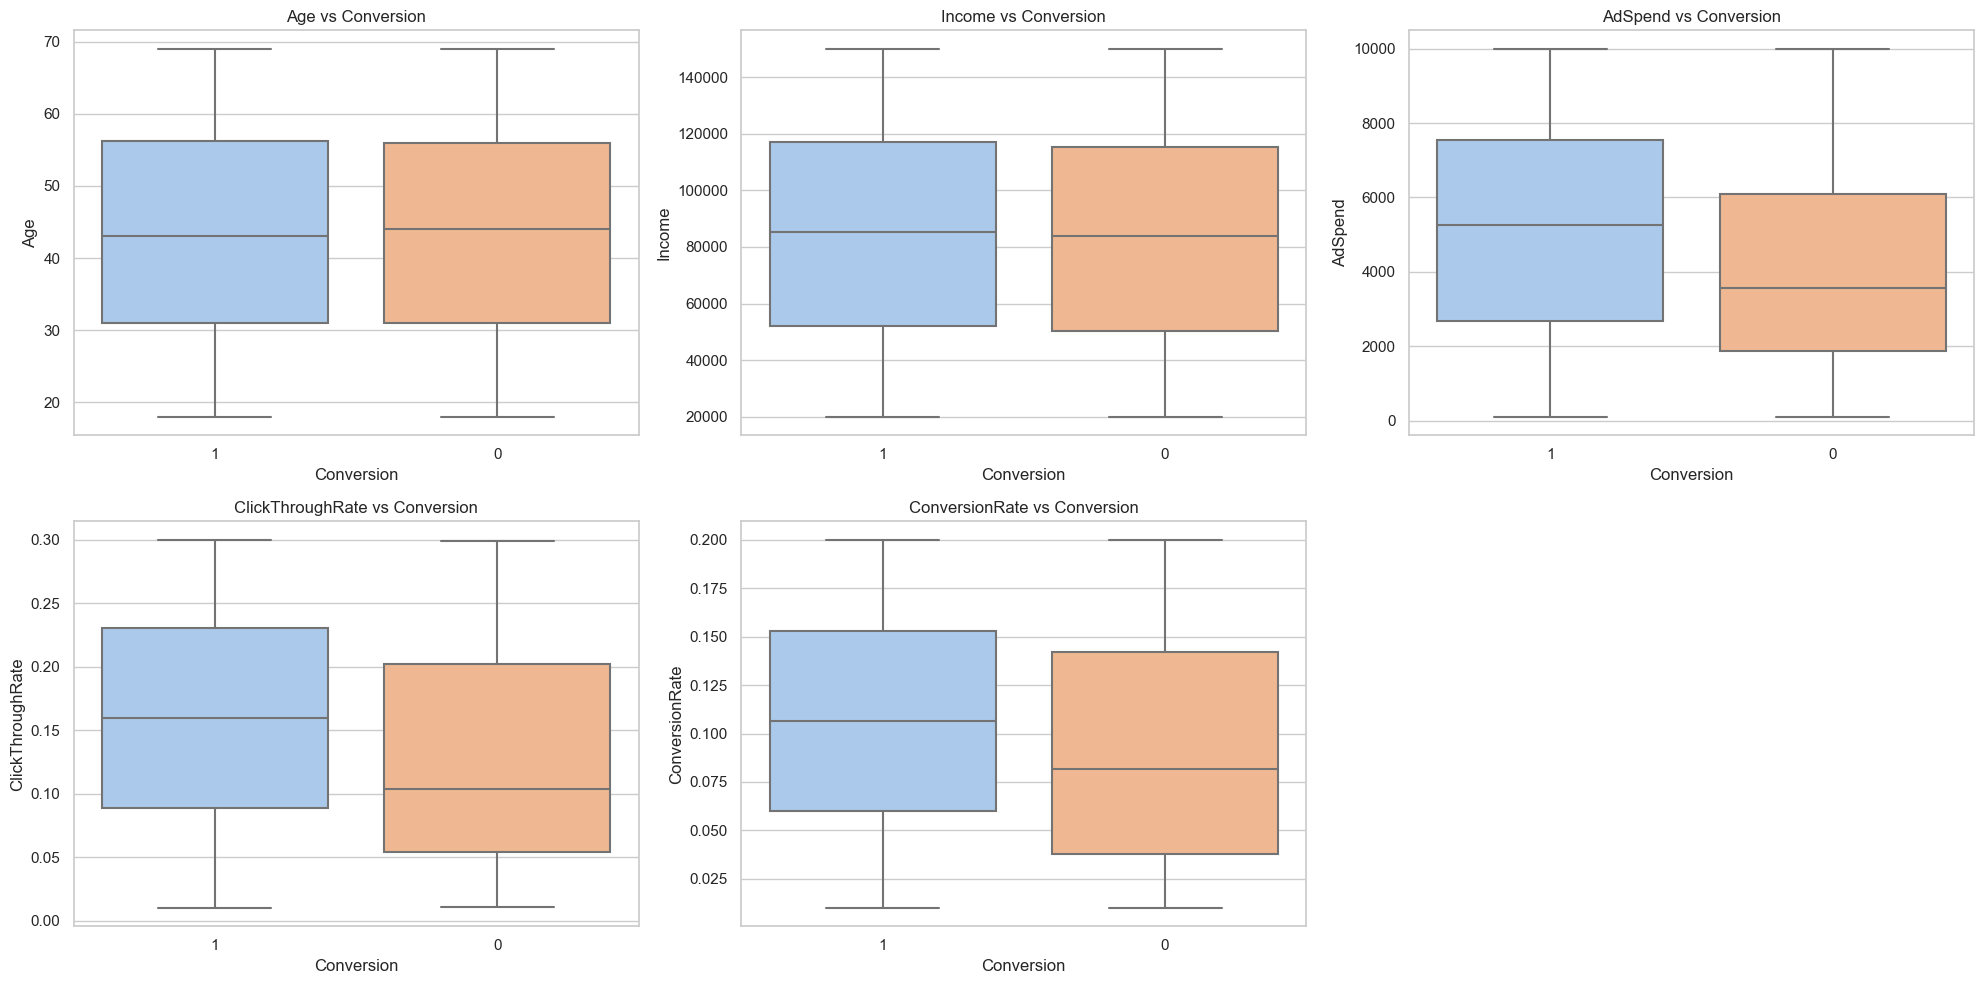

In [20]:
# 4. Numerical vs Conversion (Boxplot)
plt.figure(figsize=(20, 10))
for i, column in enumerate(['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate'], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Conversion', y=column, data=df)
    plt.title(f'{column} vs Conversion')
plt.tight_layout()
plt.show()

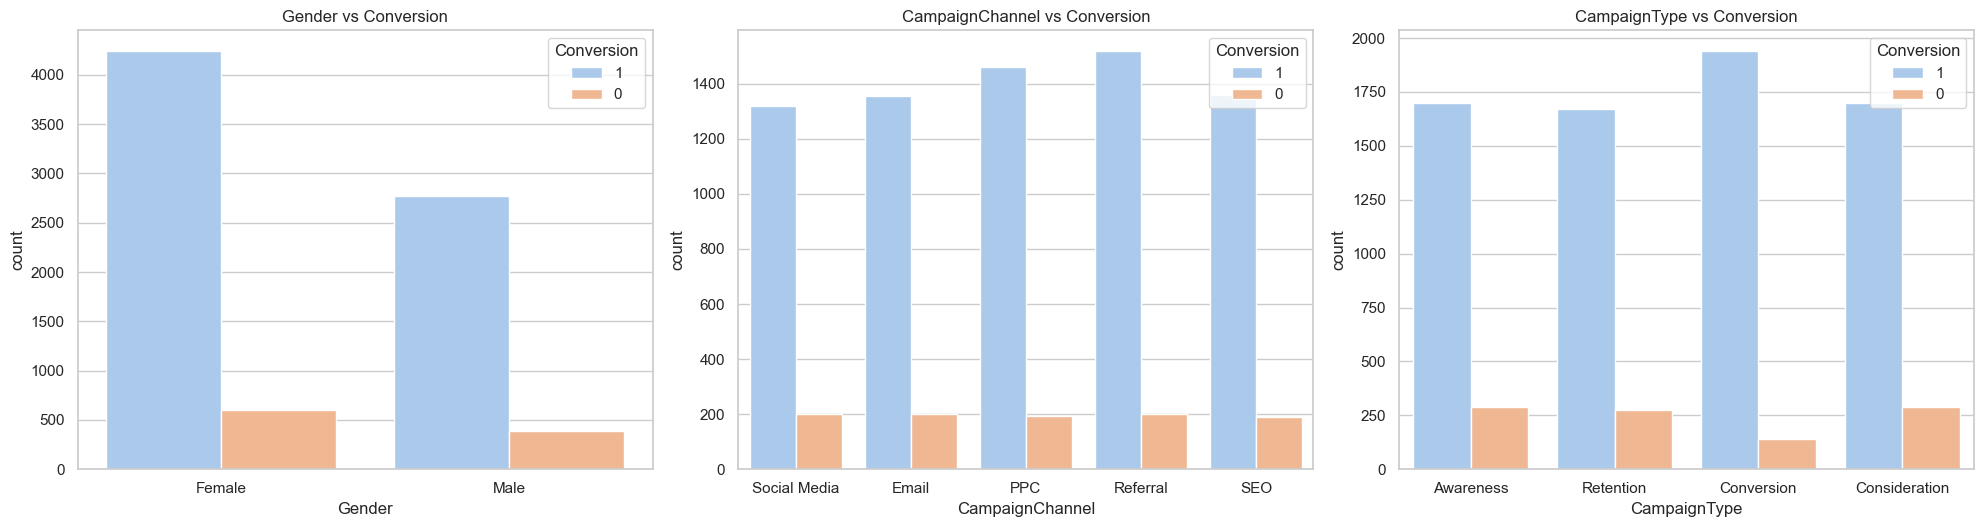

In [21]:
# Identify categorical columns in the DataFrame
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# 5. Categorical vs Conversion (Countplot)
plt.figure(figsize=(20, 10))
for i, column in enumerate(categorical_columns[:-1], 1):  # Exclude 'Conversion' for now
    plt.subplot(2, 3, i)
    sns.countplot(x=column, hue='Conversion', data=df)
    plt.title(f'{column} vs Conversion')
plt.tight_layout()
plt.show()


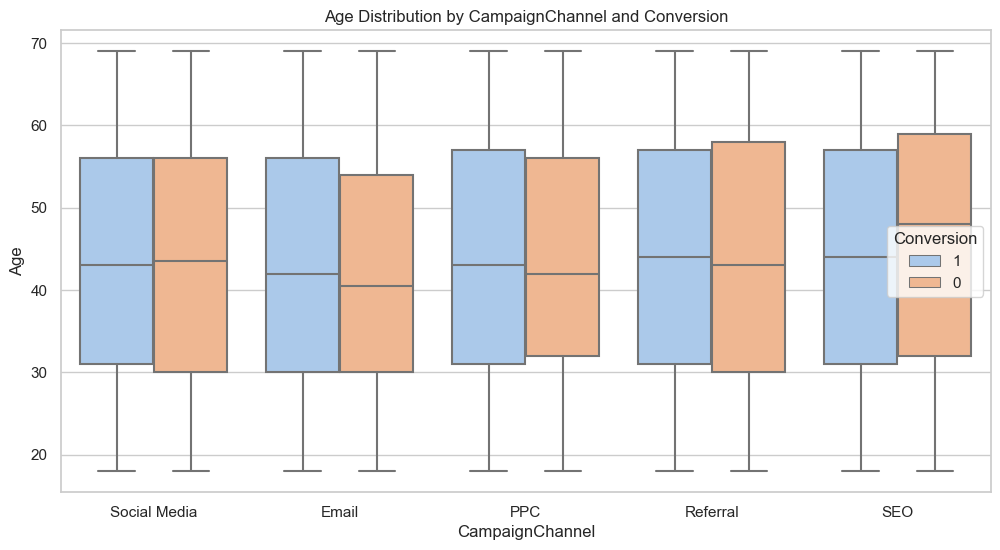

In [22]:
# 6. Interaction: CampaignChannel and Conversion by Age (Boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='CampaignChannel', y='Age', hue='Conversion', data=df)
plt.title('Age Distribution by CampaignChannel and Conversion')
plt.show()

## Step 5: Feature Engineering

In [24]:
# Encoding categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

In [25]:
# Feature Scaling
scaler = StandardScaler()
numerical_features = ['AdSpend', 'ClickThroughRate', 'ConversionRate']  # Example numerical columns
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

In [26]:
print("\nEncoded and Scaled Data Preview:")
print(df_encoded.head())


Encoded and Scaled Data Preview:
   Age  Income   AdSpend  ClickThroughRate  ConversionRate  WebsiteVisits  \
0   56  136912  0.527484         -1.320328       -0.298084              0   
1   69   41760 -0.388418          0.010671        1.427538             42   
2   46   88456 -1.217296          1.460225       -0.509632              2   
3   32   44085 -1.572106         -0.204964       -0.298580             47   
4   60   83964 -1.170918          1.166907        0.101164              0   

   PagesPerVisit  TimeOnSite  SocialShares  EmailOpens  ...  LoyaltyPoints  \
0       2.399017    7.396803            19           6  ...            688   
1       2.917138    5.352549             5           2  ...           3459   
2       8.223619   13.794901             0          11  ...           2337   
3       4.540939   14.688363            89           2  ...           2463   
4       2.046847   13.993370             6           6  ...           4345   

   Gender_Male  CampaignChannel_PP

## Step 6: Model Selection and Training

In [28]:
# Print the column names to verify the target column
print(df_encoded.columns)

# Splitting the data into train and test sets
X = df_encoded.drop(columns=['Conversion_1'])  # Make sure 'Conversion' is the correct column name
y = df_encoded['Conversion_1']


Index(['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'Gender_Male', 'CampaignChannel_PPC', 'CampaignChannel_Referral',
       'CampaignChannel_SEO', 'CampaignChannel_Social Media',
       'CampaignType_Consideration', 'CampaignType_Conversion',
       'CampaignType_Retention', 'Conversion_1'],
      dtype='object')


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "LightGBM": lgb.LGBMClassifier(),
    "CatBoost": cb.CatBoostClassifier(verbose=0)
}


In [31]:
# Training and evaluating models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Performance evaluation
    print(f"\nModel: {name}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


Model: Decision Tree
Classification Report:
              precision    recall  f1-score   support

       False       0.33      0.40      0.36       194
        True       0.91      0.89      0.90      1406

    accuracy                           0.83      1600
   macro avg       0.62      0.64      0.63      1600
weighted avg       0.84      0.83      0.84      1600

Confusion Matrix:
[[  77  117]
 [ 153 1253]]

Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.12      0.21       194
        True       0.89      1.00      0.94      1406

    accuracy                           0.89      1600
   macro avg       0.86      0.56      0.57      1600
weighted avg       0.88      0.89      0.85      1600

Confusion Matrix:
[[  23  171]
 [   5 1401]]

Model: Gradient Boosting
Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.39      0.54       194
        


Random Forest F1 Score: 0.94


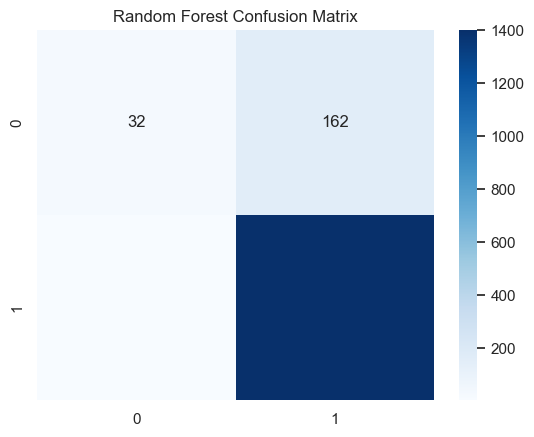

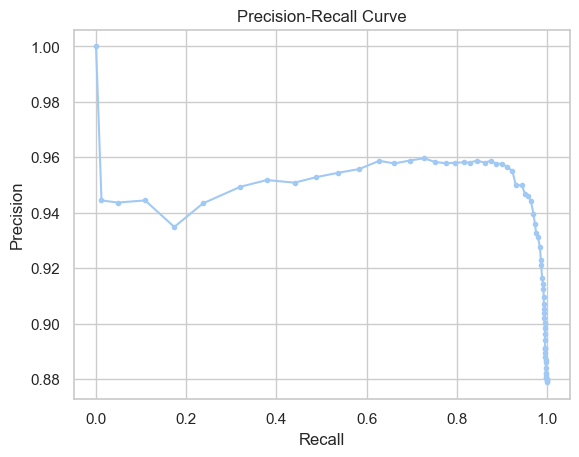

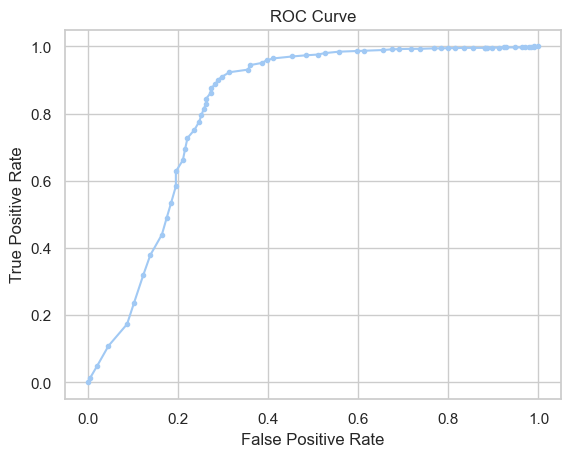

In [32]:
# Random Forest example (can be applied to other models)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# F1 Score
f1 = f1_score(y_test, y_pred_rf)
print(f"\nRandom Forest F1 Score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(recall, precision, marker='.', label="Random Forest")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, marker='.', label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


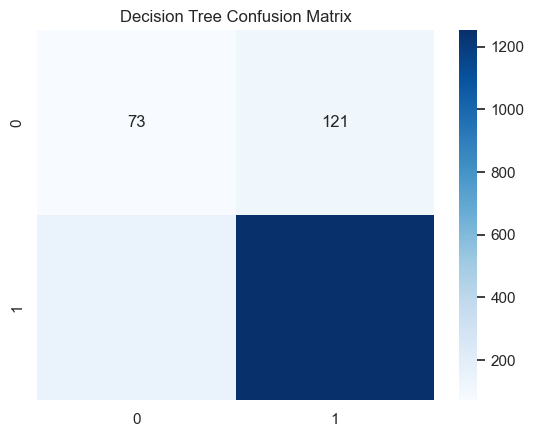

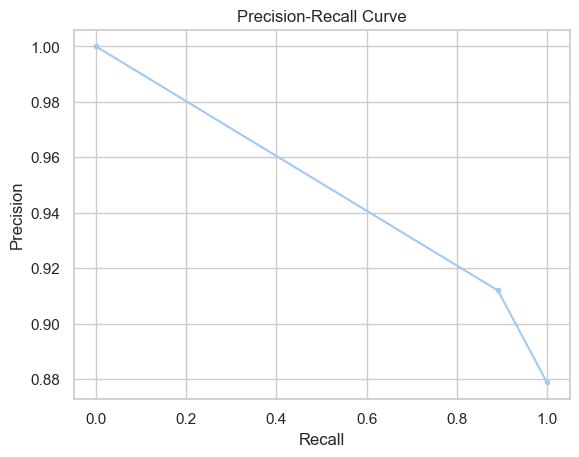

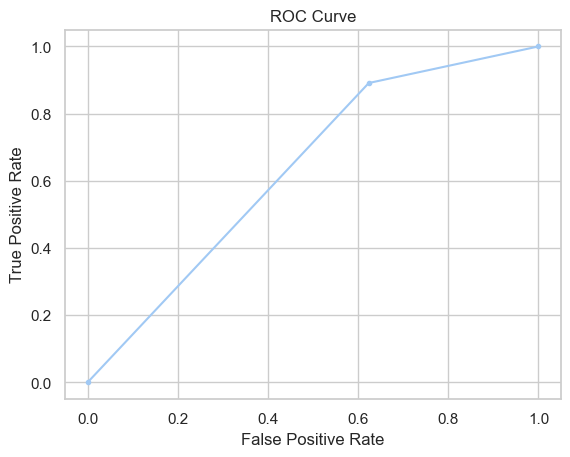

In [33]:

# Instantiate and fit the model
dt = DecisionTreeClassifier()  # Initialize the DecisionTreeClassifier
dt.fit(X_train, y_train)  # Fit the model to the training data

# Confusion Matrix
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, dt.predict_proba(X_test)[:, 1])
plt.plot(recall, precision, marker='.', label="Decision Tree")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, marker='.', label=f"Decision Tree (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()



Gradient Boosting F1 Score: 0.96


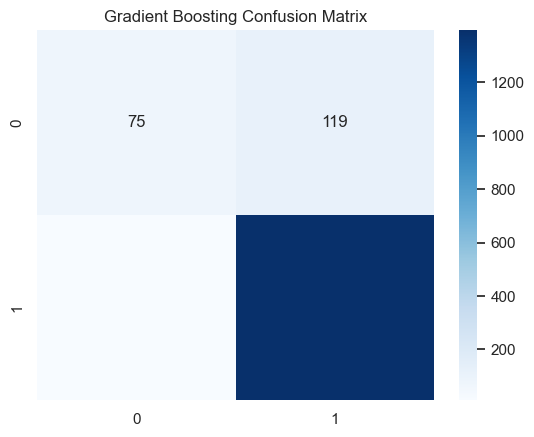

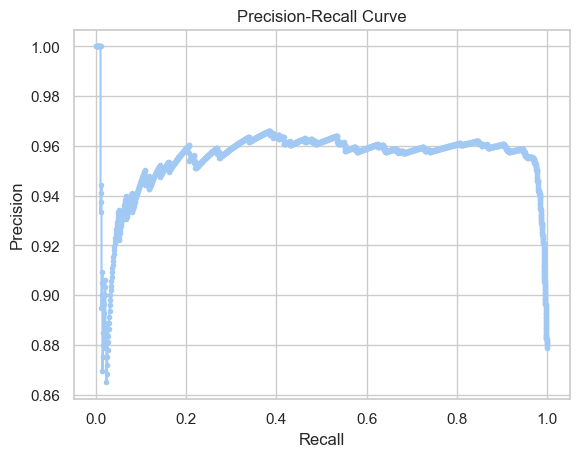

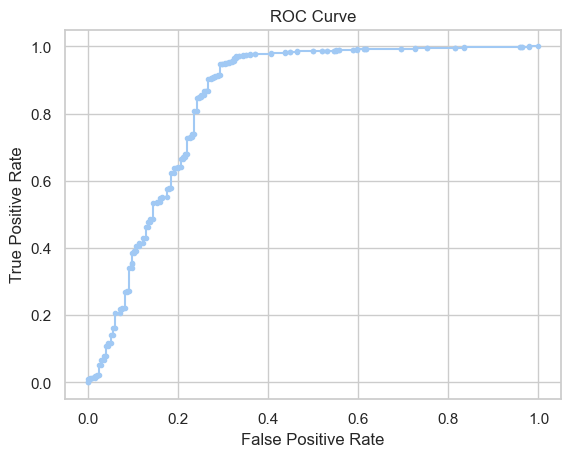

In [34]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Instantiate and fit the Gradient Boosting model
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# F1 Score
f1 = f1_score(y_test, y_pred_gb)
print(f"\nGradient Boosting F1 Score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Gradient Boosting Confusion Matrix")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, gb.predict_proba(X_test)[:, 1])
plt.plot(recall, precision, marker='.', label="Gradient Boosting")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, gb.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, marker='.', label=f"Gradient Boosting (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


C:\Users\Gagan Shetty\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:39:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost F1 Score: 0.95


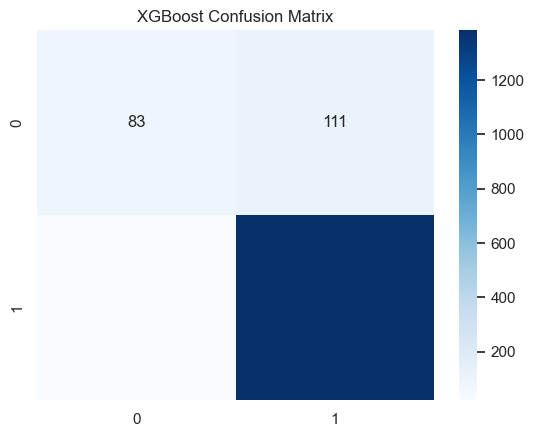

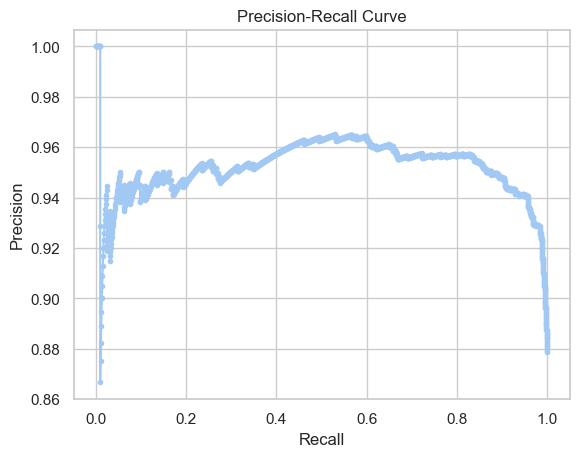

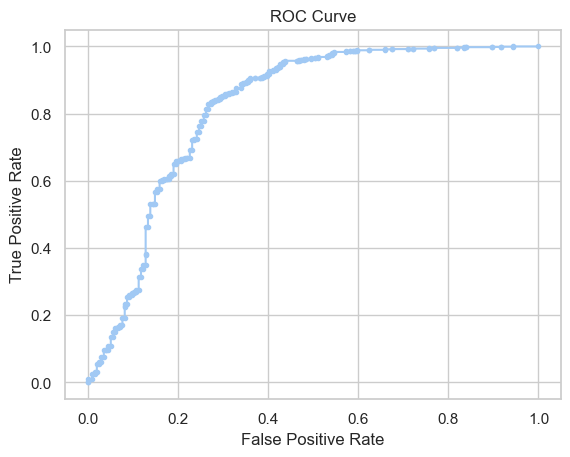

In [35]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Instantiate and fit the XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # eval_metric is set to prevent warnings
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# F1 Score
f1 = f1_score(y_test, y_pred_xgb)
print(f"\nXGBoost F1 Score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, xgb.predict_proba(X_test)[:, 1])
plt.plot(recall, precision, marker='.', label="XGBoost")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, xgb.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, marker='.', label=f"XGBoost (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5606, number of negative: 794
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.875938 -> initscore=1.954509
[LightGBM] [Info] Start training from score 1.954509

LightGBM F1 Score: 0.95


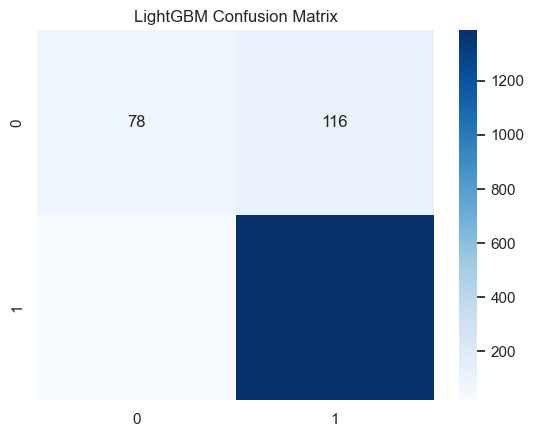

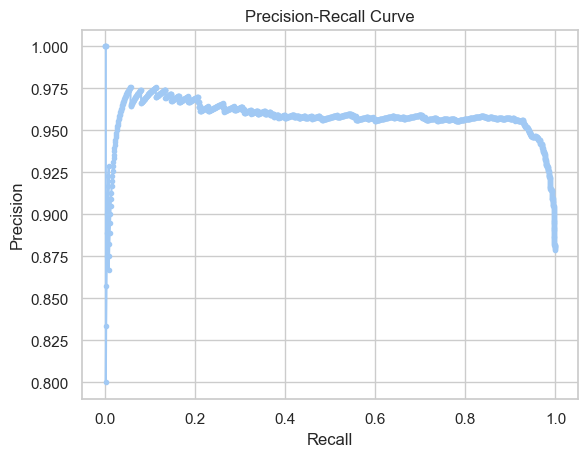

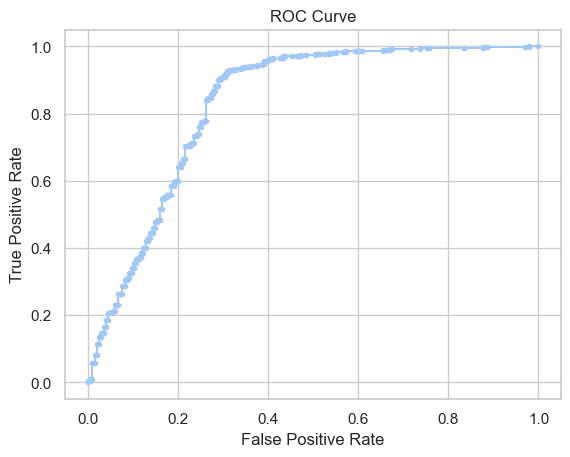

In [36]:
# Import necessary libraries
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Instantiate and fit the LightGBM model
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

# F1 Score
f1 = f1_score(y_test, y_pred_lgbm)
print(f"\nLightGBM F1 Score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("LightGBM Confusion Matrix")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, lgbm.predict_proba(X_test)[:, 1])
plt.plot(recall, precision, marker='.', label="LightGBM")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, lgbm.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, marker='.', label=f"LightGBM (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()



CatBoost F1 Score: 0.96


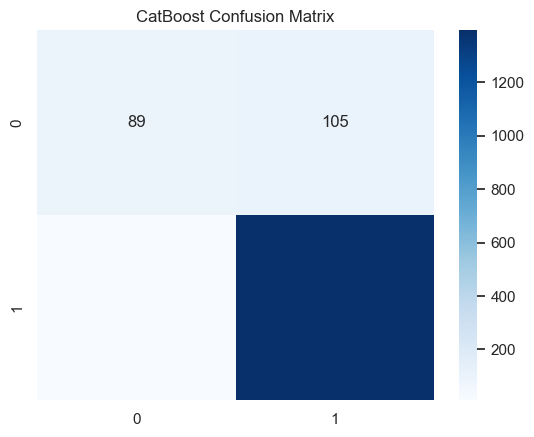

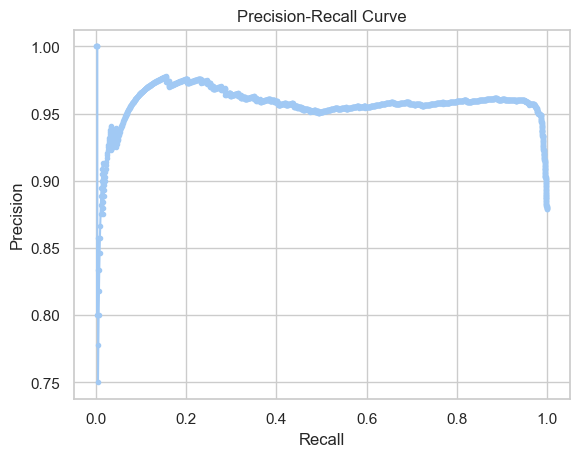

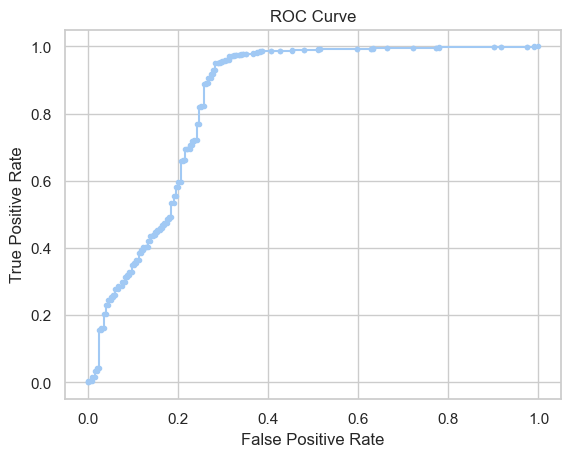

In [37]:
# Import necessary libraries
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Instantiate and fit the CatBoost model
catboost = CatBoostClassifier(verbose=0)  # verbose=0 to suppress training output
catboost.fit(X_train, y_train)
y_pred_catboost = catboost.predict(X_test)

# F1 Score
f1 = f1_score(y_test, y_pred_catboost)
print(f"\nCatBoost F1 Score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_catboost)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("CatBoost Confusion Matrix")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, catboost.predict_proba(X_test)[:, 1])
plt.plot(recall, precision, marker='.', label="CatBoost")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, catboost.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, marker='.', label=f"CatBoost (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


## CatBoost Model have the Highest accuracy

In [39]:
# Save the trained model to a file
catboost.save_model('catboost_model.cbm')

In [40]:
import joblib

# Assuming your trained CatBoost model is named 'model'
joblib.dump(catboost, 'catboost_model.pkl')


['catboost_model.pkl']

## Code Complete